<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/DataAugmentation(Reduce_overfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL #image library to manipulate it's files (pillow)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#here we have zip files so we have to convert the zip file into images folder
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir) #to convert the images path into str for getting from here
data_dir 

PosixPath('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [6]:
#we can use this glob function which we import from pathlib for getting any directories photos path
#for getting rosses photos
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg')]

🟢**Note**: We are not dealing the images by importing image here directly because it can consume lot of the computation there we are dealing the image from thier path to save the time.

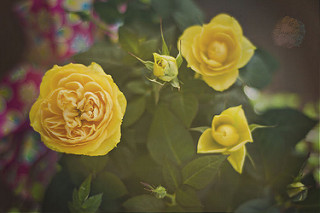

In [7]:
#to show the image from thier path we will use the pillow library
PIL.Image.open(str(roses[1]))

In [8]:
# In the same way we can also get the photos paths from other folders
tulips=list(data_dir.glob("tulips/*"))

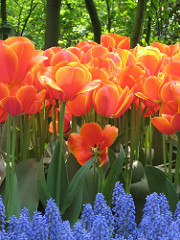

In [9]:
PIL.Image.open(str(tulips[0]))

In [10]:
#Now I am going to give the labels to the images
flowers_images_dict={
    'roses':list(data_dir.glob("roses/*")),
    'daisy':list(data_dir.glob("daisy/*")),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob("sunflowers/*")),
    'tulips':list(data_dir.glob("tulips/*"))
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg')]

In [12]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'

In [14]:
#Lets convert them to opencv objects
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [15]:
#Now let's resize the image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
#Now let's make dataset by reading images path
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_image=cv2.resize(img,(180,180))
    X.append(resized_image)
    y.append(flowers_labels_dict[flower_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
X[0].shape

(180, 180, 3)

In [19]:
#let's convert it to numpy array
X=np.array(X)
y=np.array(y)

In [20]:
X.shape

(3670, 180, 180, 3)

In [21]:
#Now let's apply the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [22]:
len(X_train)

2752

In [23]:
len(X_test)

918

In [24]:
#Now let's scale the images
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:
X_train_scaled[0]

array([[[0.30588235, 0.51764706, 0.45098039],
        [0.30196078, 0.5254902 , 0.46666667],
        [0.28627451, 0.52941176, 0.48235294],
        ...,
        [0.0745098 , 0.12156863, 0.14509804],
        [0.0745098 , 0.12156863, 0.14509804],
        [0.07058824, 0.11764706, 0.14117647]],

       [[0.30588235, 0.52156863, 0.45490196],
        [0.30196078, 0.5254902 , 0.46666667],
        [0.28235294, 0.52941176, 0.48235294],
        ...,
        [0.07843137, 0.1254902 , 0.14901961],
        [0.07843137, 0.1254902 , 0.14901961],
        [0.0745098 , 0.12156863, 0.14509804]],

       [[0.30588235, 0.52156863, 0.45490196],
        [0.29803922, 0.5254902 , 0.46666667],
        [0.27843137, 0.52941176, 0.48235294],
        ...,
        [0.0745098 , 0.1254902 , 0.14901961],
        [0.0745098 , 0.1254902 , 0.14901961],
        [0.0745098 , 0.1254902 , 0.14901961]],

       ...,

       [[0.09411765, 0.13333333, 0.16078431],
        [0.09411765, 0.12941176, 0.16078431],
        [0.09019608, 0

In [26]:
#apply model
model=Sequential(
[
    #using cnn
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
 #Dense network
 layers.Flatten(),#for converting to single dimesional array
 layers.Dense(128,activation='relu'),
 layers.Dense(5)
]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
model.fit(X_train_scaled,y_train,epochs=22)

Epoch 1/22
86/86 [==============================] - 6s 24ms/step - loss: 1.5062 - accuracy: 0.3452
Epoch 2/22
86/86 [==============================] - 2s 24ms/step - loss: 1.0982 - accuracy: 0.5541
Epoch 3/22
86/86 [==============================] - 2s 24ms/step - loss: 0.8940 - accuracy: 0.6617
Epoch 4/22
86/86 [==============================] - 2s 24ms/step - loss: 0.6965 - accuracy: 0.7449
Epoch 5/22
86/86 [==============================] - 2s 24ms/step - loss: 0.4823 - accuracy: 0.8252
Epoch 6/22
86/86 [==============================] - 2s 24ms/step - loss: 0.2804 - accuracy: 0.9092
Epoch 7/22
86/86 [==============================] - 2s 24ms/step - loss: 0.1606 - accuracy: 0.9502
Epoch 8/22
86/86 [==============================] - 2s 24ms/step - loss: 0.0920 - accuracy: 0.9771
Epoch 9/22
86/86 [==============================] - 2s 24ms/step - loss: 0.0537 - accuracy: 0.9822
Epoch 10/22
86/86 [==============================] - 2s 25ms/step - loss: 0.0392 - accuracy: 0.9884
Epoch 11/

In [27]:
model.evaluate(X_test,y_test) #overfitting is detected here

29/29 [==============================] - 1s 12ms/step - loss: 773.0348 - accuracy: 0.5280


[773.0347900390625, 0.5280172228813171]

In [28]:
predictions=model.predict(X_test_scaled)

29/29 [==============================] - 0s 12ms/step


In [29]:
predictions

array([[  2.721413  ,  18.38211   ,   7.5697107 ,  -1.3034868 ,
         -4.3720098 ],
       [  5.7260327 ,  -7.2684093 ,   9.879026  ,   2.9605927 ,
          4.252641  ],
       [ -1.2204845 ,   2.7998786 ,   3.5055428 ,  11.277112  ,
          0.7760658 ],
       ...,
       [ -1.8391126 ,   9.92935   ,   5.174434  ,   2.8622117 ,
          0.27904677],
       [ 21.185638  ,  -0.50449765, -15.09647   ,  -4.9958596 ,
          8.904627  ],
       [  6.625285  ,  -3.6132138 ,   1.2206647 ,  12.536794  ,
          4.319224  ]], dtype=float32)

In [30]:
#to convert them into positive numbers we will use softmax
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5799252e-07, 9.9997973e-01, 2.0147707e-05, 2.8225735e-09,
       1.3122074e-10], dtype=float32)>

In [31]:
# to get the index with highest number
np.argmax(score)

1

In [32]:
y_test[0]

1

###let's apply data augmentation

In [42]:
data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomZoom(0.3),#this will zoom the image
     layers.experimental.preprocessing.RandomContrast(0.3),#to add contrast
    layers.experimental.preprocessing.RandomRotation(0.9)#to rotate image
    ]
)

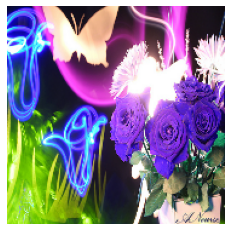

In [34]:
plt.axis('off')
plt.imshow(X[0])

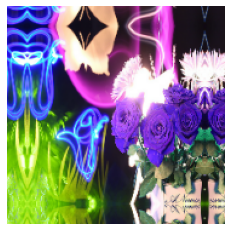

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))#zoomed in image

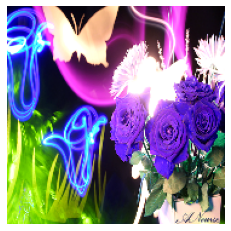

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))#increase contrast image

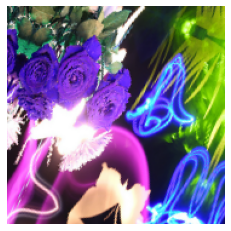

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))#rotated image

In [44]:
#now we will use the data augmentation layer to change the images and increasing dataset to the model
#apply model
model=Sequential(
[
    data_augmentation,
    #using cnn
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
 #dropout layer
 layers.Dropout(0.2),
 #Dense network
 layers.Flatten(),#for converting to single dimesional array
 layers.Dense(128,activation='relu'),
 layers.Dense(5)
]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30


86/86 [==============================] - 14s 128ms/step - loss: 1.5159 - accuracy: 0.3394
Epoch 2/30
86/86 [==============================] - 11s 126ms/step - loss: 1.1492 - accuracy: 0.5280
Epoch 3/30
86/86 [==============================] - 11s 129ms/step - loss: 1.0186 - accuracy: 0.5919
Epoch 4/30
86/86 [==============================] - 11s 128ms/step - loss: 0.9694 - accuracy: 0.6225
Epoch 5/30
86/86 [==============================] - 11s 128ms/step - loss: 0.8943 - accuracy: 0.6493
Epoch 6/30
86/86 [==============================] - 11s 127ms/step - loss: 0.9025 - accuracy: 0.6403
Epoch 7/30
86/86 [==============================] - 11s 128ms/step - loss: 0.8781 - accuracy: 0.6592
Epoch 8/30
86/86 [==============================] - 11s 127ms/step - loss: 0.8413 - accuracy: 0.6697
Epoch 9/30
86/86 [==============================] - 11s 128ms/step - loss: 0.8105 - accuracy: 0.6868
Epoch 10/30
86/86 [==============================] - 11s 130ms/step - loss: 0.8113 - accuracy: 0.6886


In [46]:
model.evaluate(X_test_scaled,y_test) #overfitting is reduced

29/29 [==============================] - 0s 15ms/step - loss: 0.7618 - accuracy: 0.6972


[0.7618463635444641, 0.6971677541732788]